## For Stock & NON Stock
1. Which are the top Manufacturers with price, quantity?

2. Which are the most profitable products?

3. Which is the product where you have seen a decrease in the price?

4. Which is the product where you have seen an increase in the price?

5. Which is the top category by price and quantity?

6. Which products are aging?

7. How to Decrease Product aging?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [48]:
df = pd.concat(pd.read_excel('imus.xlsx', sheet_name=None), ignore_index=True)
df

,category,manufacturer,part_number,sku,alt_sku,description,status,qty,price,sku_create_date
0,1539,MS-OPEN VALUE SUBSCRIPTION,021-09108,BA0011,NaN,"1YR OFFICESTD ALNG LICSAPK OLV, D AP",No Stock,0,143.58,2020-08-17
1,1539,MS-OPEN VALUE SUBSCRIPTION,059-07014,BA0025,NaN,"1YR WORD ALNG LICSAPK OLV D AP,",No Stock,0,56.09,2020-08-17
2,1539,MS-OPEN VALUE SUBSCRIPTION,065-06444,BA0039,NaN,"1YR EXCEL ALNG LICSAPK OLV D AP,",No Stock,0,56.09,2020-08-17
3,1539,MS-OPEN VALUE SUBSCRIPTION,076-04355,BA0067,NaN,"1YR PRJCT ALNG LICSAPK OLV D AP,",No Stock,0,217.60,2020-08-17
4,1582,MS-OPEN VALUE SUBSCRIPTION,077-05318,BA0080,NaN,"1YR ACCESS ALNG LICSAPK OLV D, AP",No Stock,0,56.09,2020-08-17
...,...,...,...,...,...,...,...,...,...,...
2627921,9945,VERBATIM CORPORATION,93975,986034,NaN,"CD & DVD TRIMPAK CASES 200PK, CLEAR FLEXIBLE P...",In Stock,12,50.53,2020-08-28
2627922,9945,VERBATIM CORPORATION,93975,986034,NaN,"CD & DVD TRIMPAK CASES 200PK, CLEAR FLEXIBLE P...",In Stock,12,50.53,2020-08-28
2627923,9945,VERBATIM CORPORATION,93975,986034,NaN,"CD & DVD TRIMPAK CASES 200PK, CLEAR FLEXIBLE P...",In Stock,12,50.53,2020-08-28
2627924,9945,VERBATIM CORPORATION,93975,986034,NaN,"CD & DVD TRIMPAK CASES 200PK, CLEAR FLEXIBLE P...",In Stock,12,50.53,2020-08-28


In [3]:
df.shape #shapeof the dataset

(2627926, 10)

In [4]:
df.columns #col present in the dataset

Index(['category', 'manufacturer', 'part_number', 'sku', 'alt_sku',
       'description', 'status', 'qty', 'price', 'sku_create_date'],
      dtype='object')

In [5]:
# A concise summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627926 entries, 0 to 2627925
Data columns (total 10 columns):
 #   Column           Dtype         
---  ------           -----         
 0   category         int64         
 1   manufacturer     object        
 2   part_number      object        
 3   sku              object        
 4   alt_sku          object        
 5   description      object        
 6   status           object        
 7   qty              int64         
 8   price            float64       
 9   sku_create_date  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 200.5+ MB


In [6]:
# Checking missing values
df.isnull().sum()

category                 0
manufacturer             0
part_number              0
sku                      0
alt_sku            2613442
description              0
status                   0
qty                      0
price                    0
sku_create_date          0
dtype: int64

## EXPLORATORY DATA ANALYSIS

In [49]:
df['manufacturer'].min()

'22MILES'

In [8]:
df['manufacturer'].max()

'ZYXEL -LICENSING'

In [9]:
df['qty'].min()

0

In [10]:
df['qty'].max()

60063

In [11]:
df['sku_create_date'].min()

Timestamp('2020-08-17 00:00:00')

In [12]:
df['sku_create_date'].max()

Timestamp('2020-08-28 00:00:00')

In [52]:
# Which are the top Manufacturers with price, quantity?
# Grouping top Manufacturers with price, quantity
df_trend = df.groupby(['manufacturer','price','qty']).sum()
df_trend.sort_values(['manufacturer','price','qty'], ascending=False)

category
manufacturer      price   qty          
ZYXEL -LICENSING  2422.89 0        1322
                  2229.06 0        2462
                  2130.02 0        1322
                  1845.32 0        1322
                  1845.31 0        3138
...                                 ...
365 SERVICES      175.00  0        2462
                  156.00  0        2462
                  120.00  0        2462
360 SMART NETWORK 53.38   0        9915
22MILES           1024.14 0        9920

[339949 rows x 1 columns]

In [14]:
df_trend = df.groupby('manufacturer').sum()['price'].reset_index()
df_trend

,manufacturer,price
0,22MILES,1024.14
1,360 SMART NETWORK,53.38
2,365 SERVICES,36280.00
3,3D SYSTEMS,19964.92
4,3M - OPTICAL SYSTEMS DIVISION,416521.98
...,...,...
1479,ZOOM VIDEO,501.64
1480,ZOOMSWITCH,592.82
1481,ZOTAC,24775.11
1482,ZYXEL,2139502.12


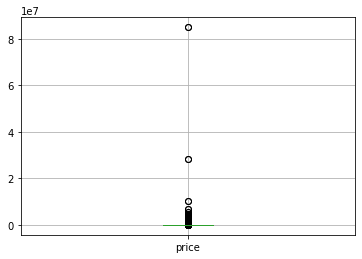

In [15]:
df.boxplot('price')
plt.show()

In [16]:
# Generating descriptive statistics summary
df.describe().round()

,category,qty,price
count,2627926.0,2627926.0,2627926.0
mean,2380.0,41.0,1883.0
std,2777.0,580.0,82021.0
min,1.0,0.0,0.0
25%,701.0,0.0,21.0
50%,1535.0,0.0,95.0
75%,2240.0,2.0,500.0
max,9999.0,60063.0,84974533.0


In [17]:
df = pd.read_excel('imus.xlsx', sheet_name = ['2020-08-17','2020-08-18','2020-08-19','2020-08-20','2020-08-21','2020-08-24','2020-08-25','2020-08-26','2020-08-27','2020-08-28'])
df

{'2020-08-17':          category                manufacturer      part_number     sku  \
 0            1539  MS-OPEN VALUE SUBSCRIPTION        021-09108  BA0011   
 1            1539  MS-OPEN VALUE SUBSCRIPTION        059-07014  BA0025   
 2            1539  MS-OPEN VALUE SUBSCRIPTION        065-06444  BA0039   
 3            1539  MS-OPEN VALUE SUBSCRIPTION        076-04355  BA0067   
 4            1582  MS-OPEN VALUE SUBSCRIPTION        077-05318  BA0080   
 ...           ...                         ...              ...     ...   
 1048570      1241          IOSAFE DIRECT SHIP  75200-3838-1500  6QP586   
 1048571      1241          IOSAFE DIRECT SHIP  75200-3838-1500  6QP586   
 1048572      1241          IOSAFE DIRECT SHIP  75200-3840-1500  6QP587   
 1048573      1241          IOSAFE DIRECT SHIP  75200-3840-1500  6QP587   
 1048574      1241          IOSAFE DIRECT SHIP  75200-3840-1500  6QP587   
 
         alt_sku                                        description    status  \
 0 

In [18]:
dfm = pd.concat(df[i] for i in df.keys())
dfm

,category,manufacturer,part_number,sku,alt_sku,description,status,qty,price,sku_create_date
0,1539,MS-OPEN VALUE SUBSCRIPTION,021-09108,BA0011,NaN,"1YR OFFICESTD ALNG LICSAPK OLV, D AP",No Stock,0,143.58,2020-08-17
1,1539,MS-OPEN VALUE SUBSCRIPTION,059-07014,BA0025,NaN,"1YR WORD ALNG LICSAPK OLV D AP,",No Stock,0,56.09,2020-08-17
2,1539,MS-OPEN VALUE SUBSCRIPTION,065-06444,BA0039,NaN,"1YR EXCEL ALNG LICSAPK OLV D AP,",No Stock,0,56.09,2020-08-17
3,1539,MS-OPEN VALUE SUBSCRIPTION,076-04355,BA0067,NaN,"1YR PRJCT ALNG LICSAPK OLV D AP,",No Stock,0,217.60,2020-08-17
4,1582,MS-OPEN VALUE SUBSCRIPTION,077-05318,BA0080,NaN,"1YR ACCESS ALNG LICSAPK OLV D, AP",No Stock,0,56.09,2020-08-17
...,...,...,...,...,...,...,...,...,...,...
49949,9945,VERBATIM CORPORATION,93975,986034,NaN,"CD & DVD TRIMPAK CASES 200PK, CLEAR FLEXIBLE P...",In Stock,12,50.53,2020-08-28
49950,9945,VERBATIM CORPORATION,93975,986034,NaN,"CD & DVD TRIMPAK CASES 200PK, CLEAR FLEXIBLE P...",In Stock,12,50.53,2020-08-28
49951,9945,VERBATIM CORPORATION,93975,986034,NaN,"CD & DVD TRIMPAK CASES 200PK, CLEAR FLEXIBLE P...",In Stock,12,50.53,2020-08-28
49952,9945,VERBATIM CORPORATION,93975,986034,NaN,"CD & DVD TRIMPAK CASES 200PK, CLEAR FLEXIBLE P...",In Stock,12,50.53,2020-08-28


In [19]:
dfm['price'].describe()

count    2.627926e+06
mean     1.882534e+03
std      8.202102e+04
min      0.000000e+00
25%      2.108000e+01
50%      9.531000e+01
75%      4.998400e+02
max      8.497453e+07
Name: price, dtype: float64

In [60]:
#using quantile function to check the 25,50 and 70 percentiles
Q1 = np.quantile(dfm['price'],0.25)
Q2 = np.quantile(dfm['price'],0.50)
Q3 = np.quantile(dfm['price'],0.75)

In [62]:
# to get lowerwishker
IQR = Q3 - Q1
IQR

478.76

In [70]:
# filtering the data with the parts in stocke to solve the problems related to 'in stock'
Instock = dfm.copy()
s = Instock[Instock['status'] == 'In Stock'].copy()
s

,category,manufacturer,part_number,sku,alt_sku,description,status,qty,price,sku_create_date
253,9920,CASE LOGIC-PERSONAL & PORTABLE,3200943,BA6371,NaN,"LAPTOP ROLLING CASE BLACK, SECURITY FRIENDLY 17IN",In Stock,7,99.00,2020-08-17
271,531,OMNITRON SYSTEMS,7206-0,BA6834,NaN,"1000BASE-SX SFP LC/MM/DF 850NM, 550M PLUGGABLE...",In Stock,2,59.09,2020-08-17
320,9070,ZEBRA ENTERPRISE MCD-A1,SAC5070-800CR,BC0227,NaN,"RS507 8SLOT BATTERY CHARGE KIT, EXT PWR SUPL/U...",In Stock,3,500.06,2020-08-17
324,9080,ZEBRA ENTERPRISE MCD-A1,KT-CLMPT-RS507-01R,BC0232,NaN,"RS507 TRIGGER SWIVEL DOES NOT, INCLUDE STRAP/B...",In Stock,115,86.34,2020-08-17
326,9080,ZEBRA ENTERPRISE MCD-A1,KT-PAD-RS507-10R,BC0234,NaN,"10 CT COMFORT PADS FOR RS507,",In Stock,42,51.80,2020-08-17
...,...,...,...,...,...,...,...,...,...,...
49949,9945,VERBATIM CORPORATION,93975,986034,NaN,"CD & DVD TRIMPAK CASES 200PK, CLEAR FLEXIBLE P...",In Stock,12,50.53,2020-08-28
49950,9945,VERBATIM CORPORATION,93975,986034,NaN,"CD & DVD TRIMPAK CASES 200PK, CLEAR FLEXIBLE P...",In Stock,12,50.53,2020-08-28
49951,9945,VERBATIM CORPORATION,93975,986034,NaN,"CD & DVD TRIMPAK CASES 200PK, CLEAR FLEXIBLE P...",In Stock,12,50.53,2020-08-28
49952,9945,VERBATIM CORPORATION,93975,986034,NaN,"CD & DVD TRIMPAK CASES 200PK, CLEAR FLEXIBLE P...",In Stock,12,50.53,2020-08-28


In [39]:
#sorting the value in descending order
top_category = s.groupby('category')['price'].max().sort_values(ascending = False).head(1)
for i in top_category.index:
    print(f'The top category with respect to price is {1}')
top_category    

The top category with respect to price is 1


category
521    69729.03
Name: price, dtype: float64

In [58]:
# Which are the most profitable products?
# Grouping products by Manufacturer and Price
product = pd.DataFrame(df.groupby(['manufacturer','price']).sum())

# Sorting the values
product.sort_values(['manufacturer'], ascending=False)

category  qty
manufacturer      price                 
ZYXEL -LICENSING  2422.89      1322    0
                  286.24       4460    0
                  172.28      44948    0
                  173.00       3784    0
                  177.95       2644    0
...                             ...  ...
365 SERVICES      2160.00      2462    0
                  120.00       2462    0
                  156.00       2462    0
360 SMART NETWORK 53.38        9915    0
22MILES           1024.14      9920    0

[239133 rows x 2 columns]

In [59]:
#Which is the top category by price and quantity?
product = pd.DataFrame(df.groupby(['price','qty']).sum())

# Sorting the values
product.sort_values(['price'], ascending=False)

,,category
price,qty,
84974533.10,0,2462
28324844.37,0,2462
10449000.00,0,2482
6966000.00,0,2482
5600000.00,0,2482
...,...,...
0.02,0,3138
0.01,0,30581233
0.00,71,2502
